In [31]:
import os
import re
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 6)

In [32]:
def extract_fitness_values(line):
    value_strings = line[line.find('[') + 1:line.find(']')].split()
    return tuple(float(s) for s in value_strings)

In [33]:
def parse_front_fitnesses_to_frame(path):
    lines = !grep "\[" {path}
    fitness_values = [extract_fitness_values(line) for line in lines]
    frame = pd.DataFrame.from_records(fitness_values, columns=('map', 'epc', 'eild'))
    return frame

In [34]:
era_out_dir = '../era-outs/20171011-spea-ml-1m-out/'
fold = 1
frames = []
for run in range(5):
    fitnesses_file = os.path.join(era_out_dir, f'best_ind_binaries/front-u{fold}-run{run}/front_fitnesses.log')
    frame = parse_front_fitnesses_to_frame(fitnesses_file)
    frames.append(frame)
    
combined_frame = pd.concat(frames)
combined_frame.to_csv('combined_front.csv')

In [35]:
fitnesses_file = '../era-outs/20171011-spea-ml-1m-out/best_ind_binaries/front-u1-run0/front_fitnesses.log'
#fitnesses_file = '../../ERA/yelp-out/best_ind_binaries/front-u1-run0/front_fitnesses.log'
frame = parse_front_fitnesses_to_frame(fitnesses_file)
frame.to_csv('front.csv')

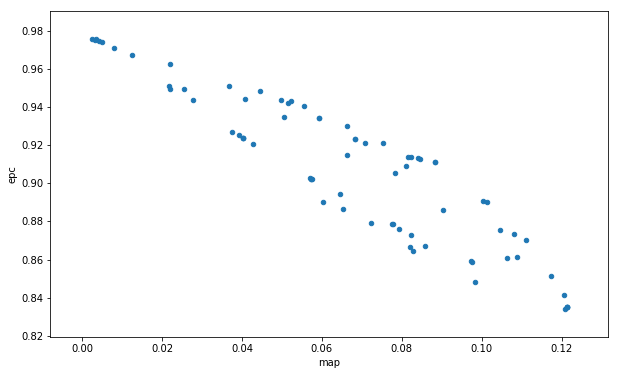

In [36]:
frame.plot.scatter('map', 'epc')

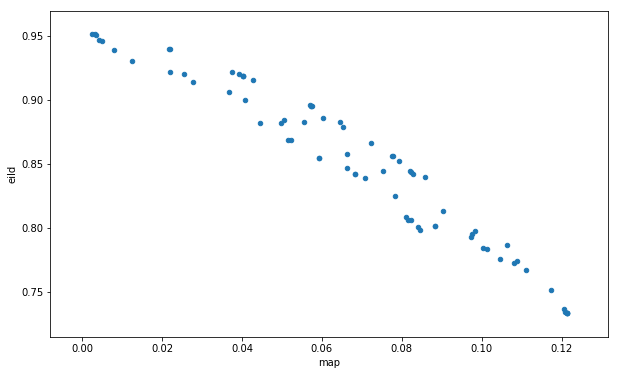

In [37]:
frame.plot.scatter('map', 'eild')

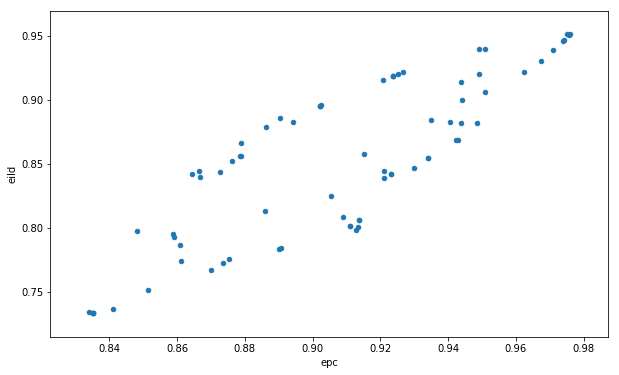

In [38]:
frame.plot.scatter('epc', 'eild')

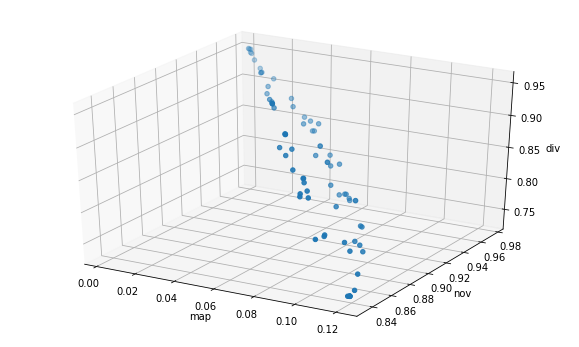

In [39]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(frame.map, frame.epc, frame.eild)
threedee.set_xlabel('map')
threedee.set_ylabel('nov')
threedee.set_zlabel('div')
plt.savefig('3d_front.png')